## Diffusion Limited Aggregation

In [1]:
import numpy as np
import random
from skimage import measure
from functools import reduce

In [27]:
def spawn_walkers(mat, N=10):
    """
    spawn N random walkers on the given matrix
    
    args:
        :mat - matrix to place walkers
        :N (int) - number of walkers to spawn
    """
    # viable locations to spawn are those that are unoccupied
    viable_loc_mat = np.ones(mat.shape) - mat    
    viable_locs = list(np.array(np.where(viable_loc_mat > 0)).T)
    assert len(viable_locs) >= N, "There are not {} spawn locations".format(N)

    spawn_locs = random.sample(viable_locs, N)
    args = zip(*spawn_locs)
    mat[list(args)] = 1
    
def move_walkers(mat):
    """
    parallelize the movement of random walkers, for now 
    if a collision 
    
    0) define a new matrix
    1) sweep through matrix and find walkers
        1a) clustered walkers are locked for this (and hence every subsequent) timestep
    2) vectorizedly decide their next positions 
    3) return the result
    
    args:
        :mat - matrix containing walkers
    """
    # label clusters with skimage magic
    walkers_lbld = measure.label(mat, connectivity=1)
    # extract indexes by returning all indices that had a one
    idx = [np.array(np.where(walkers_lbld == label)).T.tolist() for label in np.unique(walkers_lbld) if label]
    M = np.zeros(mat.shape)  # new matrix
    mask = [] 
    try:  # test if there are clusters > length 2, concatenate each such cluster, split into 2 sep. arrays
        mask = list(zip(*reduce(lambda x1,x2: x1 + x2, filter(lambda x: len(x) > 1, idx))))
        M[mask] = 1
    except TypeError:  # implies no clusters exist
        pass
    
    # map from integers to directions up, down, left, right
    NSEW = {0:np.array([0,1]),
            1:np.array([0,-1]),
            2:np.array([-1,0]),
            3:np.array([1,0])}
    
    # get movers that aren't found in clusters
    movers = np.array(list(filter(lambda x: x not in mask, map(lambda x: np.array(x[0]), idx))))
    # select moves for each mover
    moves = np.array(list(map(lambda x: NSEW[x], np.random.randint(0,high=4,size=len(movers)))))
    # generate the next positions for the walkers to move with periodic boundaries
    next_positions = list(zip(*np.mod(movers + moves,mat.shape)))
    M[next_positions] = 1
    
    return M

def plot_matrix(A,name):
    X,Y = zip(*np.array(np.where(mat>0)).T.tolist())
    plt.scatter(X,Y)
    plt.xticks([]); plt.yticks([]);
    plt.savefig(name)

In [24]:
import matplotlib.pyplot as plt

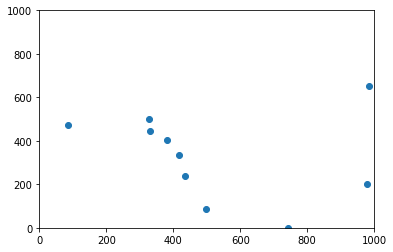

1
[(88, 329, 331, 380, 418, 437, 499, 742, 979, 987), (473, 500, 445, 405, 333, 239, 85, 1, 201, 651)]
2
[(88, 329, 331, 381, 418, 437, 498, 742, 979, 986), (474, 499, 446, 405, 332, 240, 85, 2, 202, 651)]
2
[(88, 330, 330, 381, 417, 436, 497, 742, 979, 986), (475, 499, 446, 406, 332, 240, 85, 3, 203, 650)]
2
10


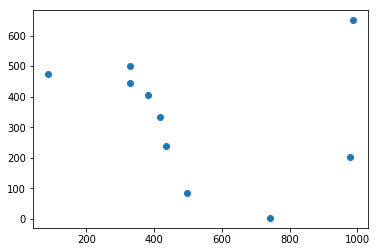

In [29]:
dims = (1000,1000)
mat = np.zeros(dims)
spawn_walkers(mat, N=10)
X, Y = zip(*np.array(np.where(mat > 0)).T.tolist())
plt.scatter(X,Y)
plt.ylim(0,dims[0])
plt.xlim(0,dims[1])
plt.show()
print(1)
mat = move_walkers(mat)
mat = move_walkers(mat)
mat = move_walkers(mat)
X, Y = zip(*np.array(np.where(mat > 0)).T.tolist())
plt.scatter(X,Y)

print(len(X))
#print(2)
#mat = move_walkers(mat)
#print(3)
#mat = move_walkers(mat)
plt.show()


In [ ]:

spawn_walkers(starter_mat, N=100)
spawn_walkers(starter_mat, N=100)
#print(starter_mat)
move_walkers(starter_mat)
#print(starter_mat)
#(min_row, min_col, max_row, max_col)
#print(starter_mat[]
#for k in range(0,1000,10):
##    print("\r{:5d}".format(k),end="",flush=True)
#    spawn_walkers(starter_mat)

In [ ]:
starter_mat[starter_mat == 1]

In [ ]:
starter_mat[0:1,5:6] = 123

starter_mat

In [ ]:
A = np.ones((10,10))

In [ ]:
A[[1,1],[2,2]] = 3

In [ ]:
A